# SurfinBH (Surrogate Final BH) demo
Description: Python package for evaluating numerical relativity surrogate remnant black hole models.   
Webpage: https://github.com/vijayvarma392/surfinBH

Notebook author: Vijay Varma, 2020. (Contact: vijay.varma392@gmail.com, [vijayvarma.com](https://vijayvarma.com/))

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as P
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")     # This is just for the demo, you may want to remove this

import surfinBH

## Installation
#### PyPi
`pip install surfinBH`
#### Conda
`conda install -c conda-forge surfinbh`
#### Source
`
git clone https://github.com/vijayvarma392/surfinBH
cd surfinBH
git submodule init
git submodule update
python setup.py install
`

## Available models

In [2]:
print(surfinBH.fits_collection.keys())

dict_keys(['NRSur3dq8Remnant', 'surfinBH7dq2', 'NRSur7dq4Remnant'])


In [3]:
fit_name = 'NRSur7dq4Remnant'
print(surfinBH.fits_collection[fit_name].desc)
print(surfinBH.fits_collection[fit_name].refs)

Fits for remnant mass, spin and kick veclocity for generically precessing BBH systems up to mass ratio 4.
arxiv:1905.09300


In [4]:
fit_name = 'NRSur3dq8Remnant'
print(surfinBH.fits_collection[fit_name].desc)
print(surfinBH.fits_collection[fit_name].refs)

Fits for remnant mass, spin and kick veclocity for nonprecessing BBH systems. This model was called surfinBH3dq8 in the paper.
arxiv:1809.09125


## Load your favorite model (this only needs to be done once at the start of a script)

In [5]:
fit = surfinBH.LoadFits('NRSur7dq4Remnant')

Loaded NRSur7dq4Remnant fit.


## Read the documentation

In [6]:
help(fit)

Help on Fit7dq4 in module surfinBH._fit_evaluators.fit_7dq4 object:

class Fit7dq4(surfinBH.surfinBH.SurFinBH)
 |  Fit7dq4(name, load_nrsur=False)
 |  
 |  A class for the NRSur7dq4Remnant model presented in Varma et al.,
 |  arxiv:1905.09300, hereafter referred to as THE PAPER.
 |  
 |  This model predicts the final mass mf, final spin vector
 |  chif and final kick velocity vector vf, for the remnants of precessing
 |  binary black hole systems.  The fits are done using Gaussian Process
 |  Regression (GPR) and also provide an error estimate along with the fit
 |  value.
 |  
 |  This model has been trained in the parameter space:
 |      q <= 4, |chiA| <= 0.8, |chiB| <= 0.8
 |  
 |  However, it extrapolates reasonably to:
 |      q <= 6, |chiA| <= 1, |chiB| <= 1
 |  
 |  =========================================================================
 |  Usage:
 |  
 |  import surfinBH
 |  
 |  # Load the fit
 |  fit = surfinBH.LoadFits('NRSur7dq4Remnant')
 |  
 |  We provide the following

## Evaluate the fits (using spins at t=-100 M)

In [7]:
# Note: By default, the reference epoch is taken to be 
# at t=-100M from the waveform amplitude peak. The 
# returned chif and vf are in coorbital frame at t=-100M.

# Mass ratio and component spins at reference epoch
q = 3.2
chiA = [0.5, 0.05, 0.3]
chiB = [-0.5, -0.05, 0.1]

# remnant mass and 1-sigma error estimate
mf, mf_err = fit.mf(q, chiA, chiB)
print("mf:", mf, "mf_err:", mf_err)

# remnant spin and 1-sigma error estimate
chif, chif_err = fit.chif(q, chiA, chiB)
print("chif:", chif, "chif_err:", chif_err)

# remnant recoil kick and 1-sigma error estimate (units of c)
vf, vf_err = fit.vf(q, chiA, chiB)
print("vf:", vf, "vf_err:", vf_err)

# All of these together
mf, chif, vf, mf_err, chif_err, vf_err = fit.all(q, chiA, chiB)

mf: 0.9656720610451307 mf_err: 0.00010895992605092175
chif: [0.22590287 0.05296894 0.66365497] chif_err: [0.00058071 0.00057176 0.0004123 ]
vf: [0.00143326 0.00012996 0.00275611] vf_err: [2.83343048e-05 2.66765917e-05 7.22398079e-05]


# Evaluate the fits using spins at earlier frequencies

In [8]:
# Note: If omega0 is given, the reference epoch is taken to be the 
# time at which the orbital frequency in the coprecessing frame is
# equal to omega0. The returned chif and vf are in the LAL interial
# frame as described in the documentation.

# Mass ratio and component spins at reference epoch
q = 3.2
chiA = [0.5, 0.05, 0.3]
chiB = [-0.5, -0.05, 0.1]

#  Dimensionless orbital frequency at reference epoch (in units of rad/M)
omega0 = 7e-3
  
# remnant mass and 1-sigma error estimate
mf, mf_err = fit.mf(q, chiA, chiB, omega0=omega0)
print("mf:", mf, "mf_err:", mf_err)
 
# remnant spin and 1-sigma error estimate
chif, chif_err = fit.chif(q, chiA, chiB, omega0=omega0)
print("chif:", chif, "chif_err:", chif_err)
 
# remnant recoil kick and 1-sigma error estimate
vf, vf_err = fit.vf(q, chiA, chiB, omega0=omega0)
print("vf:", vf, "vf_err:", vf_err)
 
# All of these together
mf, chif, vf, mf_err, chif_err, vf_err = fit.all(q, chiA, chiB, omega0=omega0)

setting __package__ to gwsurrogate.new so relative imports work
__name__ = gwsurrogate.new.spline_evaluation
__package__= gwsurrogate.new
setting __package__ to gwsurrogate.new so relative imports work
setting __package__ to gwsurrogate.new so relative imports work
Loaded NRSur7dq4 model
mf: 0.9653928100919663 mf_err: 8.59577095288164e-05
chif: [0.12747008 0.00808293 0.70329037] chif_err: [0.00051558 0.00054031 0.0004079 ]
vf: [-2.52911402e-04 -1.63829495e-05 -1.87216785e-03] vf_err: [2.50307556e-05 2.18990752e-05 4.76019790e-05]


## Exercise 1: How much energy was radiated in GW150914?

In [9]:
M = 65
q = 1.22
chiA = [0, 0, 0.33]
chiB = [0, 0, -0.44]
mf, mf_err = fit.mf(q, chiA, chiB)
print ("Initial mass = %.2f MSun, final mass = %.2f MSun, energy radiated = %.2f MSun"%(M, mf*M, (1-mf)*M))

Initial mass = 65.00 MSun, final mass = 61.88 MSun, energy radiated = 3.12 MSun


## Exercise 2: What is a typical value for remnant spin magnitude?

In [10]:
# Remanant spin for and equal-mass nonspinning binary
q = 1
chiA = [0,0,0]
chiB = [0,0,0]
chif, chif_err = fit.chif(q, chiA, chiB)
print("chifmag:", np.linalg.norm(chif))

chifmag: 0.686500375363643


(array([ 1.,  0.,  2.,  3.,  3.,  3.,  7.,  8., 15., 30., 24., 38., 31.,
        33., 32., 24., 20., 14.,  8.,  4.]),
 array([0.159763  , 0.19625473, 0.23274645, 0.26923818, 0.30572991,
        0.34222164, 0.37871337, 0.4152051 , 0.45169683, 0.48818856,
        0.52468029, 0.56117202, 0.59766375, 0.63415548, 0.6706472 ,
        0.70713893, 0.74363066, 0.78012239, 0.81661412, 0.85310585,
        0.88959758]),
 <a list of 20 Patch objects>)

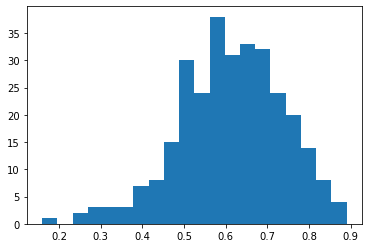

In [11]:
# Remnant spins for random binaries
chifmag_vec = []
for i in range(300):
    q = np.random.uniform(1, 4)            # kicks are maximized for equal-mass, maximally spinning systems
    chiAmag = np.random.uniform(0, 1)
    chiBmag = np.random.uniform(0, 1)
    thetaA = np.arccos(np.random.uniform(-1, 1))
    thetaB = np.arccos(np.random.uniform(-1, 1))
    phiA = np.random.uniform(0, 2*np.pi)
    phiB = np.random.uniform(0, 2*np.pi)
    chiA = chiAmag*np.array([np.sin(thetaA)*np.cos(phiA), np.sin(thetaA)*np.sin(phiA), np.cos(thetaA)])
    chiB = chiBmag*np.array([np.sin(thetaB)*np.cos(phiB), np.sin(thetaB)*np.sin(phiB), np.cos(thetaB)])    
    chif, chif_err = fit.chif(q, chiA, chiB)
    chifmag = np.linalg.norm(chif)
    chifmag_vec.append(chifmag)
P.hist(chifmag_vec, bins=20)

## Exercise 3: What mass ratio do we need for zero remnant spin?

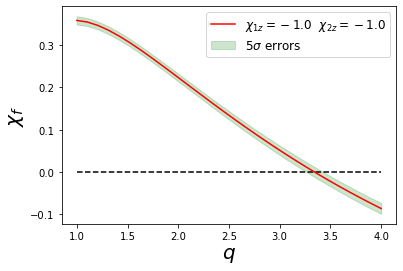

In [12]:
chiA = [0,0,-1]
chiB = [0,0,-1]
q_vec = np.linspace(1, 4, 30)
chif_vec = []
chif_err_vec = []
for q in q_vec:
    chif, chif_err = fit.chif(q, chiA, chiB)
    chif_vec.append(chif[2])
    chif_err_vec.append(chif_err[2])
chif_vec = np.array(chif_vec)
chif_err_vec = np.array(chif_err_vec)
    
P.plot(q_vec, chif_vec, label='$\chi_{1z}=%.1f$  $\chi_{2z}=%.1f$'%(chiA[2], chiB[2]), color='r')
P.fill_between(q_vec, chif_vec - 5*chif_err_vec, chif_vec + 5*chif_err_vec, alpha=0.2, 
    color='g', label="$5 \\sigma$ errors")
P.hlines(0, q_vec[0], q_vec[-1], linestyle='dashed')
P.ylabel('$\chi_f$', fontsize=20)
P.xlabel('$q$', fontsize=20)
P.legend(loc='best', fontsize=12)

## Exercise 4: What is the highest possible kick?

In [13]:
max_kick = 0
params = None
for i in range(300):
    q = 1            # kicks are maximized for equal-mass, maximally spinning systems
    chimag = 1
    thetaA = np.arccos(np.random.uniform(-1, 1))
    thetaB = np.arccos(np.random.uniform(-1, 1))
    phiA = np.random.uniform(0, 2*np.pi)
    phiB = np.random.uniform(0, 2*np.pi)
    chiA = chimag*np.array([np.sin(thetaA)*np.cos(phiA), np.sin(thetaA)*np.sin(phiA), np.cos(thetaA)])
    chiB = chimag*np.array([np.sin(thetaB)*np.cos(phiB), np.sin(thetaB)*np.sin(phiB), np.cos(thetaB)])    
    vf, vf_err = fit.vf(q, chiA, chiB)
    vfmag = np.linalg.norm(vf)
    if vfmag > max_kick:
        max_kick = vfmag
        params = [q, chiA, chiB]
        
print ("Maximum kick found = %.3f c = %.3f km/s"%(max_kick, max_kick*scipy.constants.c/1e3))
print ("For q=%.2f chiA=[%.3f, %.3f, %.3f] chiB=[%.3f, %.3f, %.3f]"%(params[0], 
    params[1][0], params[1][1], params[1][2], params[2][0], params[2][1], params[2][2]))

Maximum kick found = 0.013 c = 4017.618 km/s
For q=1.00 chiA=[0.080, 0.362, 0.929] chiB=[0.017, -0.584, 0.811]
